In [1]:
import os
import numpy as np
from pathlib import Path
import pyvista as pv

In [14]:
cyl_large = pv.Cylinder(center=[-21,-90,44], radius=12, direction=[0,1,0], height=20)

In [15]:
cyl_large.save("/home/max/Desktop/python_projects/SimJeb/SimJEB_metadata/cylinder_horizontal_large.stl")

In [8]:
mesh = pv.read("/home/max/Desktop/python_projects/SimJeb/SimJEB_surfmesh/0.obj")

In [16]:
clipped = mesh.clip_surface(cyl_large, True)

/home/max/miniconda3/envs/dev/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


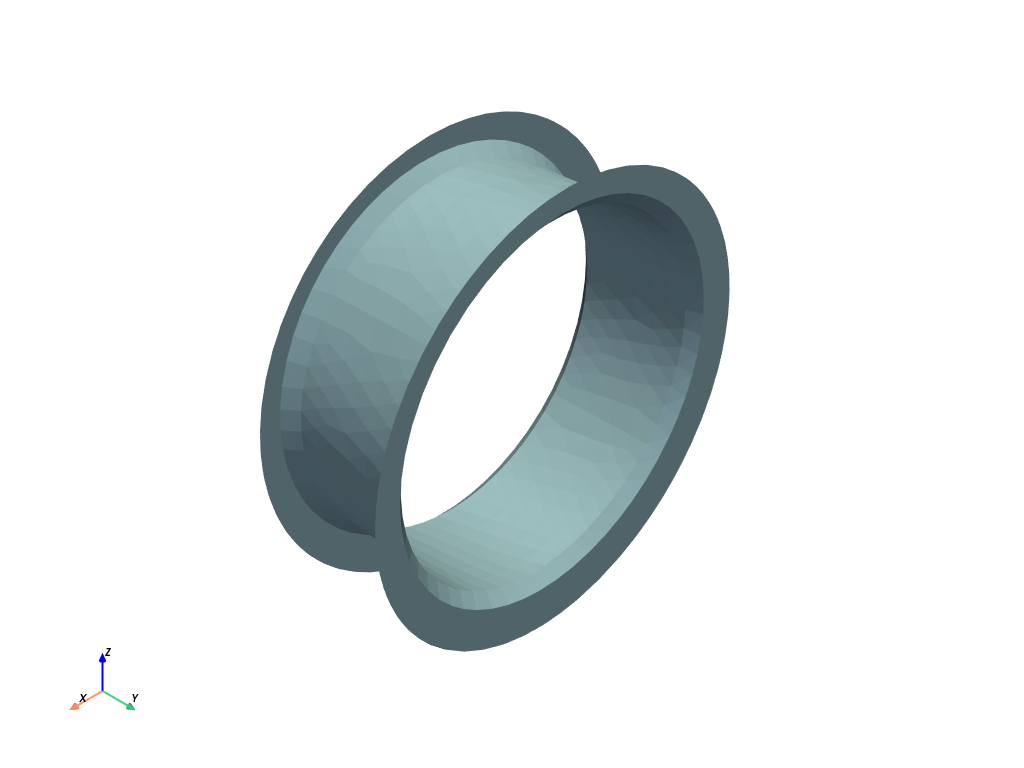

In [17]:
clipped.plot()

In [18]:
verts = clipped.points
normals = clipped.point_normals
verts = verts[np.abs(normals[:,1])<1e-3]

In [20]:
np.max(verts, axis=0), np.min(verts, axis=0)

(pyvista_ndarray([-19.8583 , -86.8082 ,  54.28106], dtype=float32),
 pyvista_ndarray([-20.6924 , -91.1322 ,  35.16882], dtype=float32))

In [22]:
center = (np.max(verts, axis=0) + np.min(verts, axis=0)) / 2
center

pyvista_ndarray([-20.275349, -88.9702  ,  44.724937], dtype=float32)

In [33]:
diameter = max(max(verts[:,0]) - min(verts[:,0]), max(verts[:,2]) - min(verts[:,2]))
diameter

19.11224

In [28]:
center[1] = -75

In [34]:
cyl_hor = pv.Cylinder(center=center, radius=diameter/2*0.99, direction=[0,1,0], height=40)

In [35]:
cyl_hor.save("/home/max/Desktop/python_projects/SimJeb/SimJEB_metadata/cylinder_horizontal.stl")